In [2]:

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


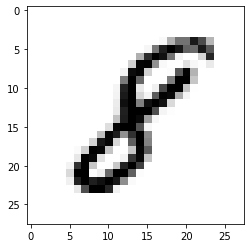

In [3]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),   
    tf.keras.layers.Dense(10, activation="softmax")
]);

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [9]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 1

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") is not None and logs.get("val_accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [14]:
with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=10, validation_data=(x_test, y_test), verbose=1, 
                                  callbacks = [callbacks], workers=10)

Epoch 1/10
1875/1875 [==============================] - 45s 20ms/step - loss: 0.2055 - accuracy: 0.9392 - val_loss: 0.0741 - val_accuracy: 0.9783
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.0580 - val_accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0561 - accuracy: 0.9818 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0415 - accuracy: 0.9865 - val_loss: 0.0535 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0536 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0557 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0560 - val_

In [12]:
with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10


ValueError: in user code:

    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:797 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\losses.py:1644 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0524 - accuracy: 0.9864


[0.05244402587413788, 0.9864000082015991]

9


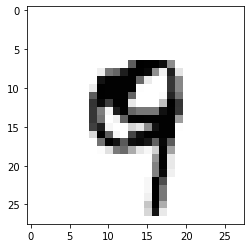

In [16]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [17]:
filepath = r"model2"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("model2.h5")

INFO:tensorflow:Assets written to: model2\assets


In [18]:
# Convert the model.
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('model2.h5')
tflite_model = converter.convert()

# Save the model.
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hanna\AppData\Local\Temp\tmp40g9brhq\assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmp40g9brhq\variables\variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_1_input
INFO:tensorflow: tensor name: serving_default_conv2d_1_input:0, shape: (-1, 28, 28, 1), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 10), type: DT_FLOAT
INFO:t

In [19]:

  with open("historia2.txt",'w') as f:
    for k in my_model.history.keys():
        print(k,file=f)
        for i in my_model.history[k]:
            print(i,file=f)

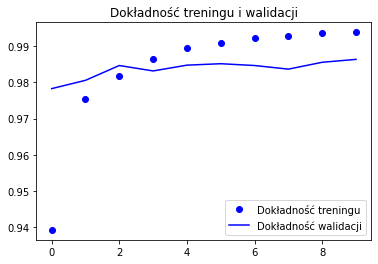

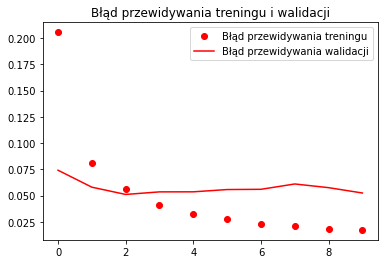

In [20]:
acc = my_model.history['accuracy'] #training accuracy scores from the model that has been trained
val_acc = my_model.history['val_accuracy'] #validation accuracy scores from the model that has been trained
loss = my_model.history['loss'] #training loss scores from the model that has been trained
val_loss = my_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Dokładność treningu')
plt.plot(epochs, val_acc, 'b', label = 'Dokładność walidacji')
plt.title('Dokładność treningu i walidacji')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Błąd przewidywania treningu')
plt.plot(epochs, val_loss, 'r', label = 'Błąd przewidywania walidacji')
plt.title('Błąd przewidywania treningu i walidacji')

plt.legend()

plt.show()